In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from SepMe.utils.graph_neighbourhoods import *
from SepMe.utils.graph_purity import *

os.getcwd()
folder = '../../'
df = pd.read_csv(folder + 'heyhey.csv',index_col=0)
pointIDXY = dict(zip(range(len(df[['x','y']])), np.array(df[['x','y']])))

SepMe - INFO - MLFLOW_TRACKING_URI - http://localhost:5000


In [6]:
print(set(df['class']))
df

{0, 1, 2}


,x,y,class,orig_class,pos,mv_true,mv_false,neighbours,ce,cp,nns
0,0.000000,0.187980,0,0,"(0.0, 0.1879798726972548)",1.0,1.0,5,0.00000,1.0,"[0, 0, 0, 0, 0]"
1,0.000562,0.492543,0,0,"(0.0005621476382362545, 0.4925431108447794)",1.0,1.0,5,0.00000,1.0,"[0, 0, 0, 0, 0]"
2,0.002041,0.057970,0,0,"(0.0020409918661411512, 0.057969767683483324)",1.0,1.0,5,0.00000,1.0,"[0, 0, 0, 0, 0]"
3,0.003542,0.035999,0,0,"(0.0035420762441208398, 0.035998989770691436)",1.0,1.0,5,0.00000,1.0,"[0, 0, 0, 0, 0]"
4,0.005683,0.763047,0,0,"(0.005683202679338084, 0.7630468093824103)",1.0,1.0,5,0.00000,1.0,"[0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...
120,0.994285,0.927208,1,1,"(0.9942852299606366, 0.9272078983071694)",0.0,1.0,5,0.92062,0.4,"[0, 0, 2, 1, 1]"
121,0.996615,0.065742,1,1,"(0.996614970114484, 0.06574194222247981)",0.0,0.0,5,1.00000,0.2,"[2, 2, 0, 0, 1]"
122,0.996685,0.524171,1,1,"(0.9966851972507292, 0.5241707727486623)",1.0,1.0,5,0.57938,0.6,"[1, 2, 2, 1, 1]"
123,0.999767,0.506035,1,1,"(0.9997669347245486, 0.5060348567742153)",1.0,1.0,5,0.57938,0.6,"[1, 2, 2, 1, 1]"


SepMe - INFO - Metric logged: get_knntree_time=0.00321
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


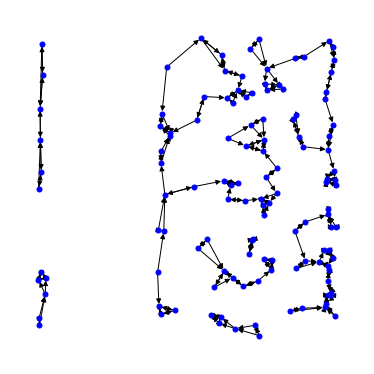

In [7]:

(graph, colors) = add_node_attr(get_knntree(df,2), df, color=True, c=1)
#plt.subplot(422, figure = f, title = 'KNNTree')
f = plt.figure(figsize=(5,5))
nx.draw(graph, pointIDXY,node_color = colors, node_size=25)
plt.show()

In [8]:
nn=1
print(graph.nodes(data=True)[nn])


{'class': 0, 'pos': (0.0005621476382362545, 0.4925431108447794)}


In [9]:
[graph.nodes(data=True)[n] for n in graph.neighbors(nn)]

[{'class': 0, 'pos': (0.006504327703258039, 0.6579637019117295)},
 {'class': 0, 'pos': (0.009544365793916263, 0.5491573827428213)}]

In [10]:
total_neighbour_purity(df, graph)

{'cp_a': 0.592,
 'ce_a': 0.36445289199998915,
 'mv_a_true': 0.4,
 'mv_a_false': 0.784,
 'cp_0': 0.63,
 'ce_0': 0.35604049528570314,
 'mv_0_true': 0.4,
 'mv_0_false': 0.86,
 'cp_1': 0.625,
 'ce_1': 0.3329154363520316,
 'mv_1_true': 0.4642857142857143,
 'mv_1_false': 0.7857142857142857,
 'cp_2': 0.39473684210526316,
 'ce_2': 0.47954327894735427,
 'mv_2_true': 0.21052631578947367,
 'mv_2_false': 0.5789473684210527}

In [11]:
ltcc(graph, df)


{'all': 0.168, 0: 0.12, 1: 0.375, 2: 0.21052631578947367}

In [73]:
df.loc[df['class']==4, :]

,x,y,class,orig_class,pos,mv_true,mv_false,neighbours,ce,cp,nns


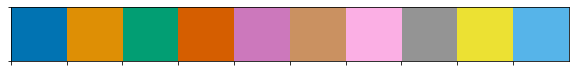

In [27]:
sns.palplot(sns.color_palette("colorblind", 10))

In [56]:
mcec(graph,df, 100)

591
[591 759 758 765 768 796 770 758 753 777 765 769 785 783 778 782 759 791
 771 763 772 749 764 780 777 746 780 778 770 786 768 778 788 772 741 763
 783 773 791 771 778 780 773 767 781 787 784 744 753 773 742 781 776 774
 753 774 806 789 775 770 732 767 771 767 737 789 781 769 782 755 790 798
 775 795 793 783 751 753 783 764 791 768 755 721 737 738 776 757 748 736
 740 773 771 780 747 772 759 750 771 758 784]


1.0